# Initialization

In [55]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import os

In [56]:
# Load the dataset
df = pd.read_csv("./Datasets/loan_approval_dataset.csv")

# Data Analysis

In [57]:
# Display the first 12 rows
print("First 12 Rows:")
df.head(12)

First 12 Rows:


,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults
0,1,56,21920,639,452748,72,4.53,Unemployed,43.35,Married,2,Mortgage,Business,0
1,2,69,126121,655,257134,60,5.38,Unemployed,10.42,Divorced,0,Mortgage,Education,0
2,3,46,96872,467,226437,72,3.46,Self-Employed,45.39,Divorced,4,Mortgage,Car,0
3,4,32,101132,751,310480,12,14.00,Unemployed,8.58,Single,2,Mortgage,Business,0
4,5,60,22093,404,13070,12,9.13,Self-Employed,20.70,Divorced,1,Mortgage,Home,0
5,6,25,32905,449,6320,24,7.46,Unemployed,32.47,Single,0,Own,Education,0
6,7,38,141759,445,356187,72,9.19,Self-Employed,30.17,Married,2,Rent,Personal,0
7,8,56,175423,598,306065,24,10.35,Employed,9.34,Widowed,4,Mortgage,Car,0
8,9,36,50981,466,11589,24,14.02,Self-Employed,40.95,Married,2,Rent,Business,0
9,10,40,93903,347,462625,48,4.73,Employed,48.79,Widowed,4,Own,Education,0


In [58]:
# Display the last 12 rows
print("Last 12 Rows:")
df.tail(12)

Last 12 Rows:


,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults
4988,4989,42,108697,430,296694,24,4.40,Unemployed,9.28,Single,4,Rent,Car,0
4989,4990,62,183945,447,484367,12,3.08,Self-Employed,6.04,Married,4,Mortgage,Personal,1
4990,4991,45,121505,680,401792,60,9.23,Employed,29.69,Widowed,2,Own,Education,0
4991,4992,18,100720,408,45868,72,5.44,Self-Employed,15.10,Single,2,Mortgage,Car,0
4992,4993,66,98199,420,103039,36,6.26,Employed,8.55,Widowed,4,Own,Education,0
4993,4994,62,176390,594,182452,12,5.56,Self-Employed,37.84,Single,1,Mortgage,Home,0
4994,4995,21,53734,419,403944,48,10.63,Self-Employed,27.41,Widowed,0,Mortgage,Personal,1
4995,4996,24,169594,755,299944,48,9.42,Self-Employed,40.83,Married,1,Mortgage,Home,0
4996,4997,66,162728,829,15886,24,3.47,Unemployed,34.88,Married,1,Own,Education,0
4997,4998,26,166965,468,477830,48,9.08,Self-Employed,37.84,Married,4,Own,Business,0


In [59]:
# print the total number of rows and columns
rows, columns = df.shape
print(f"Total number of rows: {rows}")
print(f"Total number of columns: {columns}")

Total number of rows: 5000
Total number of columns: 14


In [60]:
# list all column names along with their corresponding data types
df.dtypes

,0
Applicant_ID,int64
Age,int64
Income,int64
Credit_Score,int64
Loan_Amount,int64
Loan_Term,int64
Interest_Rate,float64
Employment_Status,object
Debt_to_Income_Ratio,float64
Marital_Status,object


In [61]:
# print the name of the first column
df.columns[0]

'Applicant_ID'

In [62]:
# Generate a summary of the dataset, including non-null counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Applicant_ID          5000 non-null   int64  
 1   Age                   5000 non-null   int64  
 2   Income                5000 non-null   int64  
 3   Credit_Score          5000 non-null   int64  
 4   Loan_Amount           5000 non-null   int64  
 5   Loan_Term             5000 non-null   int64  
 6   Interest_Rate         5000 non-null   float64
 7   Employment_Status     5000 non-null   object 
 8   Debt_to_Income_Ratio  5000 non-null   float64
 9   Marital_Status        5000 non-null   object 
 10  Number_of_Dependents  5000 non-null   int64  
 11  Property_Ownership    5000 non-null   object 
 12  Loan_Purpose          5000 non-null   object 
 13  Previous_Defaults     5000 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 547.0+ KB


In [63]:
# Choose a categorical attribute and display the distinct values it contains
categorical_attribute = "Loan_Purpose"
distinct_values = df[categorical_attribute].unique()
print(f"Distinct values in '{categorical_attribute}': {distinct_values}")

Distinct values in 'Loan_Purpose': ['Business' 'Education' 'Car' 'Home' 'Personal']


In [64]:
# Identify the most frequently occurring value in the chosen categorical attribute "Loan_Purpose"
most_frequent_value = df["Loan_Purpose"].mode()[0]
print(
    f"The most frequently occurring value in 'Loan_Purpose' is: {most_frequent_value}"
)

The most frequently occurring value in 'Loan_Purpose' is: Personal


In [65]:
# Calculate and present the mean, median, standard deviation, and percentiles for a numerical column
numerical_column = "Loan_Amount"

mean_value = df[numerical_column].mean()
median_value = df[numerical_column].median()
std_deviation = df[numerical_column].std()
percentile_20 = df[numerical_column].quantile(0.20)
percentile_50 = df[numerical_column].quantile(0.50)
percentile_80 = df[numerical_column].quantile(0.80)

print(f"Mean of '{numerical_column}': {mean_value}")
print(f"Median of '{numerical_column}': {median_value}")
print(f"Standard Deviation of '{numerical_column}': {std_deviation}")
print(f"20th Percentile of '{numerical_column}': {percentile_20}")
print(f"50th Percentile of '{numerical_column}': {percentile_50}")
print(f"80th Percentile of '{numerical_column}': {percentile_80}")

Mean of 'Loan_Amount': 252118.479
Median of 'Loan_Amount': 250846.5
Standard Deviation of 'Loan_Amount': 142580.00451972976
20th Percentile of 'Loan_Amount': 104338.6
50th Percentile of 'Loan_Amount': 250846.5
80th Percentile of 'Loan_Amount': 402960.8


# Data Preparation

In [66]:
#Apply a filter to select rows based on a specific condition of your choice (e.g., select records where a value exceeds a certain threshold).
threshold = 2.7
df[df['Interest_Rate'] < threshold]

,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults
79,80,53,111829,437,23242,72,2.60,Unemployed,39.01,Single,1,Mortgage,Car,1
295,296,18,57548,545,82173,48,2.69,Unemployed,25.85,Married,2,Rent,Education,0
365,366,64,59178,688,433410,60,2.66,Self-Employed,29.49,Widowed,3,Mortgage,Car,0
420,421,56,187031,509,171730,72,2.62,Self-Employed,28.52,Married,2,Mortgage,Personal,0
429,430,24,167175,634,49588,48,2.62,Self-Employed,24.64,Widowed,0,Own,Car,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4709,4710,55,186526,389,195679,48,2.69,Employed,8.40,Widowed,4,Rent,Personal,0
4851,4852,39,188138,454,91496,36,2.69,Self-Employed,11.90,Single,2,Mortgage,Education,1
4977,4978,42,137674,783,496592,12,2.64,Self-Employed,16.10,Widowed,0,Rent,Car,0
4978,4979,27,135074,586,295754,36,2.57,Employed,22.70,Widowed,1,Own,Home,0


In [67]:
#Identify records where a chosen attribute starts with a specific letter and count how many records match this condition (Loan_Purpose starts with 'H')
count = df[df['Loan_Purpose'].str.startswith('H', na=False)].shape[0]
print(f"Number of records where Loan Purpose starts with 'H': {count}")

Number of records where Loan Purpose starts with 'H': 979


In [68]:
#Determine the total number of duplicate rows and remove them if found
count_dups = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Number of duplicate rows removed: {count_dups}")

Number of duplicate rows removed: 0


In [69]:
#Convert the data type of a numerical column from integer to string(Loan_Amount)
df['Loan_Amount'] = df['Loan_Amount'].astype(str)

In [70]:
#Group the dataset based on two selected categorical features and analyze the results(Loan_Purpose and Loan_Term)
df.groupby(['Loan_Purpose', 'Loan_Term']).size()

Loan_Purpose  Loan_Term
Business      12           161
              24           180
              36           154
              48           160
              60           152
              72           152
Car           12           188
              24           173
              36           143
              48           168
              60           166
              72           177
Education     12           175
              24           172
              36           176
              48           155
              60           153
              72           174
Home          12           154
              24           166
              36           167
              48           176
              60           154
              72           162
Personal      12           169
              24           170
              36           178
              48           184
              60           152
              72           189
dtype: int64

In [71]:
#Check for the existence of missing values within the dataset
df.isnull().sum()

,0
Applicant_ID,0
Age,0
Income,0
Credit_Score,0
Loan_Amount,0
Loan_Term,0
Interest_Rate,0
Employment_Status,0
Debt_to_Income_Ratio,0
Marital_Status,0


In [72]:
#If any missing values are found, replace them with the median or mode as appropriate
df.fillna({col: df[col].median() for col in df.select_dtypes(include=['number']).columns}, inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [73]:
#Divide a chosen numerical column into 5 equal-width bins and count the number of records in each bin(Loan_Amount)
df['Loan_Amount'] = pd.to_numeric(df['Loan_Amount'])
df['Loan_Amount_Binned'] = pd.cut(df['Loan_Amount'], bins=5)
df['Loan_Amount_Binned'].value_counts()

,count
Loan_Amount_Binned,
"(202890.4, 301810.6]",1040
"(400730.8, 499651.0]",1024
"(103970.2, 202890.4]",1016
"(4555.399, 103970.2]",993
"(301810.6, 400730.8]",927


In [74]:
#Identify and print the row corresponding to the maximum value of a selected numerical feature(Loan_Amount)
df[df['Loan_Amount'] == df['Loan_Amount'].max()]

,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults,Loan_Amount_Binned
2856,2857,65,20654,649,499651,72,8.3,Employed,12.86,Divorced,2,Rent,Business,0,"(400730.8, 499651.0]"


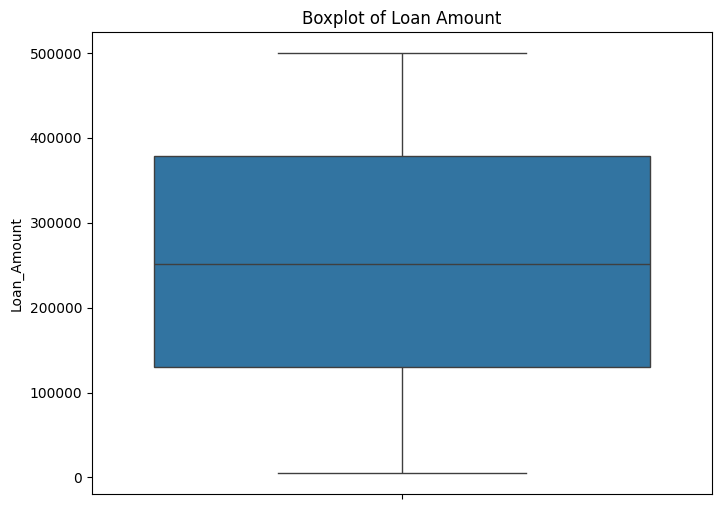

In [75]:
#Construct a boxplot for an attribute you consider significant and justify the selection(Loan_Amount)(Justification: it is useful because it helps us see the distribution of loan amounts, including any outliers, as well as it shows the minimum, maximum, median, and quartiles, which help us understand how loan amounts vary)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Loan_Amount'])
plt.title("Boxplot of Loan Amount")
plt.show()

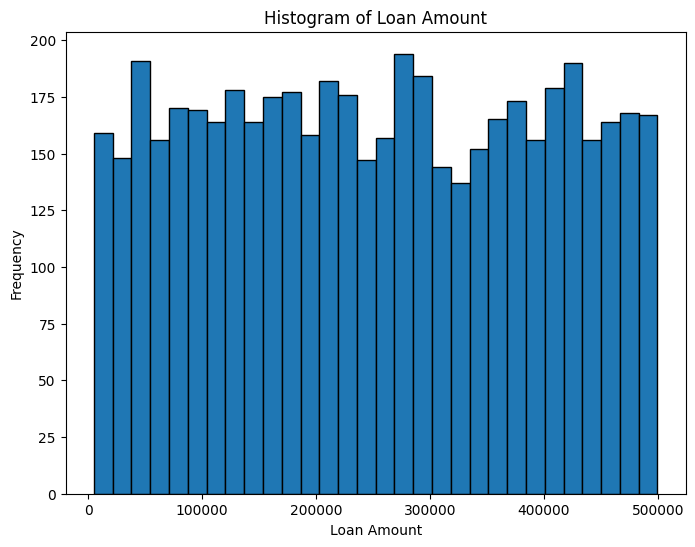

In [76]:
# Generate a histogram for a chosen attribute and provide an explanation for its relevance(Loan_Amount)(Justification: Histogram is used to see how loan amounts are distributed across different ranges. It also helps to identify whether most loans fall within a certain amount and if the data is skewed)
plt.figure(figsize=(8, 6))
plt.hist(df["Loan_Amount"], bins=30, edgecolor="black")
plt.title("Histogram of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

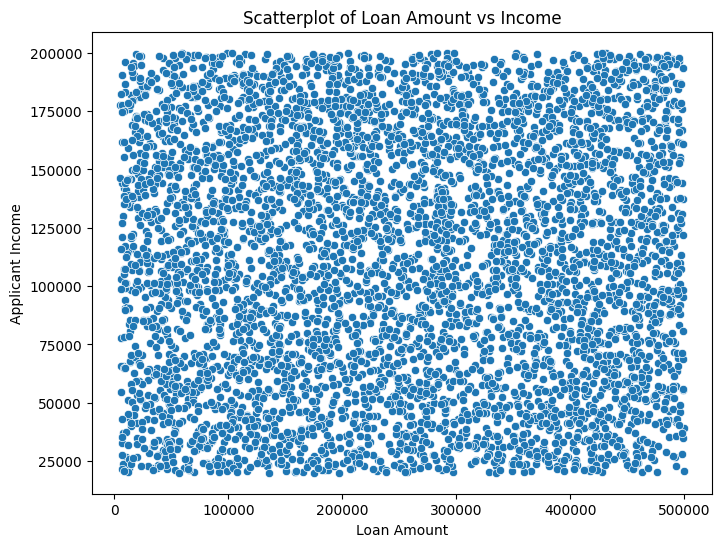

In [77]:
# Create a scatterplot using two attributes and interpret the relationship observed(Loan_Amount vs Income)(Interpretation: This Scatterplot helps us check if there’s a relationship between how much a person earns and how much they borrow. If there's a pattern, it could suggest that higher incomes lead to higher loan amounts)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Loan_Amount"], y=df["Income"])
plt.title("Scatterplot of Loan Amount vs Income")
plt.xlabel("Loan Amount")
plt.ylabel("Applicant Income")
plt.show()

In [78]:
# Normalize the numerical attributes using StandardScaler to achieve standardized data
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=["number"]).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [79]:
# Perform PCA (Principal Component Analysis) to reduce dimensionality to two components, and visualize the dataset before and after applying PCA

# PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df[numeric_columns])
df_pca = pd.DataFrame(data=pca_transformed, columns=["PC1", "PC2"])

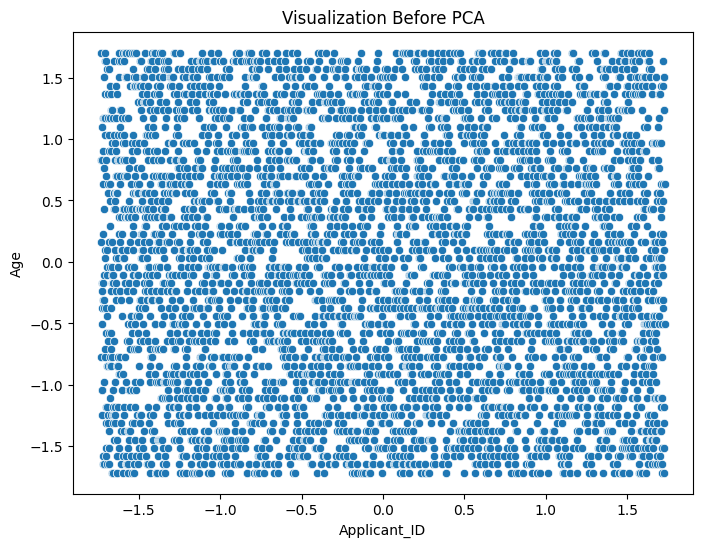

In [80]:
# Scatterplot before PCA using first two numerical columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[numeric_columns[0]], y=df[numeric_columns[1]])
plt.title("Visualization Before PCA")
plt.xlabel(numeric_columns[0])
plt.ylabel(numeric_columns[1])
plt.show()

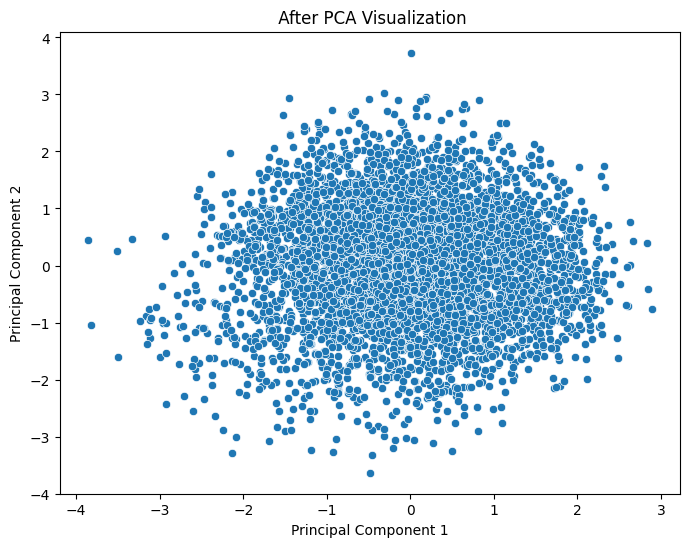

In [81]:
# Scatterplot after PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"])
plt.title(" After PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Result

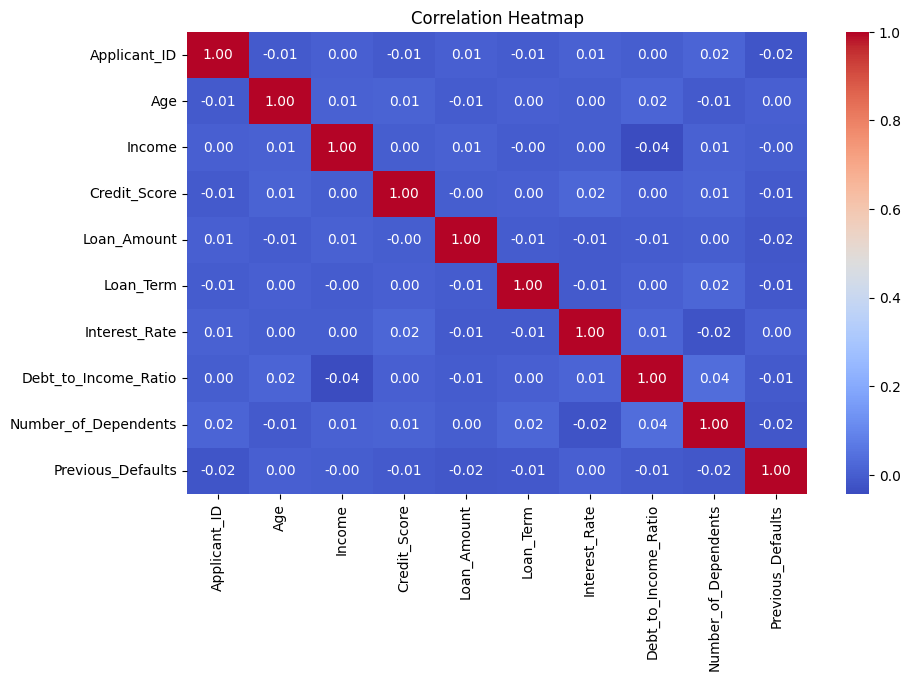

In [82]:
# Analyze the correlation between numerical features using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Class distribution for 'Loan_Purpose':
Loan_Purpose
Personal     1042
Car          1015
Education    1005
Home          979
Business      959
Name: count, dtype: int64


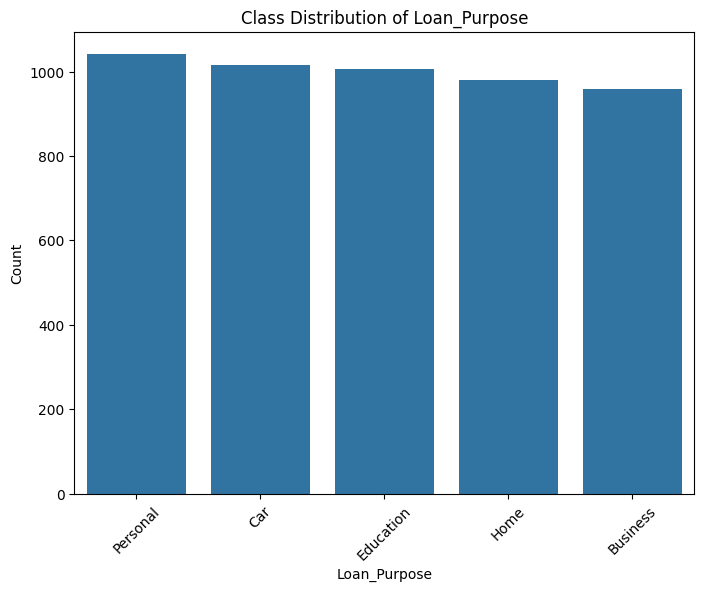

In [83]:
# Select a categorical attribute, e.g., "Loan_Purpose"
categorical_attribute = "Loan_Purpose"

# Calculate the class distribution using value_counts()
class_distribution = df[categorical_attribute].value_counts()
print(f"Class distribution for '{categorical_attribute}':")
print(class_distribution)

# Optionally, visualize the distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=categorical_attribute, order=class_distribution.index)
plt.title(f"Class Distribution of {categorical_attribute}")
plt.xlabel(categorical_attribute)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Feature Engineering:
Assess risk category by analyzing:
- Loan to Income ratio
- Credit Score
- Previous Defaults

By analyzing previous behaviour, we are able to determine whether a loan is high or low risk.

In [84]:
# Create a Loan-to-Income Ratio feature
df["Loan_to_Income_Ratio"] = df["Loan_Amount"] / df["Income"]

print("Loan-to-Income Ratio Summary:")
df["Loan_to_Income_Ratio"].describe()

Loan-to-Income Ratio Summary:


,Loan_to_Income_Ratio
count,5000.000000
mean,-20.038452
std,1386.113939
min,-97998.983161
25%,-1.006376
50%,-0.008780
75%,0.983302
max,515.149093


In [85]:
# Define a risk assessment function based on multiple factors
def risk_assessment(row):
    risk = 0
    # Factor 1: Loan-to-Income Ratio thresholds
    ratio = row["Loan_to_Income_Ratio"]
    if ratio > 0.3:
        risk += 2
    elif ratio > 0.2:
        risk += 1

    # Factor 2: Credit Score thresholds (lower scores indicate higher risk)
    cs = row["Credit_Score"]
    if cs < 600:
        risk += 2
    elif cs < 650:
        risk += 1

    # Factor 3: Previous Defaults
    if row["Previous_Defaults"] > 0:
        risk += 2

    # Classify risk based on the cumulative score
    if risk >= 4:
        return "High"
    elif risk >= 2:
        return "Medium"
    else:
        return "Low"

# Apply the risk assessment function to each row
df["Risk_Assessment"] = df.apply(risk_assessment, axis=1)

# Display the distribution of risk levels
print("Risk Assessment Distribution:")
df["Risk_Assessment"].value_counts()

Risk Assessment Distribution:


,count
Risk_Assessment,
Medium,2591
High,2409
